<a href="https://colab.research.google.com/github/dohyeonkim2526/Contest_Bigdata/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [ 데이터 전처리: 교통사고 발생건수 ]

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
data='/content/gdrive/My Drive/공모전/공공 빅데이터 분석 공모전/서울시-음주사고(17,19년).xlsx'

In [3]:
import pandas as pd
data=pd.read_excel(data)

In [4]:
name_split=data['시군구'].str.split(" ")
data['행정구']=name_split.str.get(1)
data['행정동']=name_split.str.get(2)
del(data['시군구'])

In [5]:
data['사고일시']=data['사고일시'].astype(str)

In [6]:
import re
numbers=[]

for i in range(data.shape[0]):
  row=data.iloc[i]
  row_data=row['사고일시']
  num=re.findall("\d+", row_data)
  numbers.append(num)

In [7]:
years=[]
months=[]
days=[]
hours=[]

for i in range(len(numbers)):
  row=numbers[i]
  year=row[0]     #numbers[i][0]
  month=row[1] #numbers[i][1]
  day=row[2]   #numbers[i][2]
  hour=row[3]  #numbers[i][3]
  years.append(year)
  months.append(month)
  days.append(day)
  hours.append(hour)

In [8]:
data['발생년도']=years
data['발생(month)']=months
data['발생(day)']=days
data['발생(hour)']=hours

In [9]:
data

,사고번호,사고일시,요일,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,행정구,행정동,발생년도,발생(month),발생(day),발생(hour)
0,2017010100100046,2017년 1월 1일 02시,일요일,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,40세,상해없음,승용,남,52세,상해없음,강서구,화곡동,2017,1,1,02
1,2017010100100047,2017년 1월 1일 02시,일요일,경상사고,0,0,3,0,차대차 - 기타,안전거리미확보,포장 - 건조,맑음,단일로 - 기타,승용,남,23세,상해없음,승용,남,54세,경상,강동구,길동,2017,1,1,02
2,2017010100100048,2017년 1월 1일 02시,일요일,경상사고,0,0,1,0,차대차 - 정면충돌,안전거리미확보,포장 - 건조,맑음,교차로 - 교차로안,승용,여,21세,상해없음,승용,남,59세,경상,송파구,문정동,2017,1,1,02
3,2017010100100049,2017년 1월 1일 02시,일요일,경상사고,0,0,1,0,차대차 - 정면충돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,47세,상해없음,승용,남,55세,상해없음,송파구,가락동,2017,1,1,02
4,2017010100100051,2017년 1월 1일 02시,일요일,경상사고,0,0,2,0,차대차 - 정면충돌,안전거리미확보,포장 - 건조,맑음,단일로 - 기타,승용,남,27세,상해없음,승용,남,23세,경상,서초구,서초동,2017,1,1,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7904,2019123100100059,2019년 12월 31일 03시,화요일,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,48세,상해없음,승용,여,44세,경상,영등포구,양평동4가,2019,12,31,03
7905,2019123100100064,2019년 12월 31일 04시,화요일,중상사고,0,2,0,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,여,38세,상해없음,승용,여,28세,중상,강남구,역삼동,2019,12,31,04
7906,2019123100100194,2019년 12월 31일 11시,화요일,중상사고,0,1,0,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,27세,상해없음,화물,남,65세,중상,구로구,구로동,2019,12,31,11
7907,2019123100100395,2019년 12월 31일 17시,화요일,경상사고,0,0,1,0,차대사람 - 기타,기타,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,75세,상해없음,보행자,여,45세,경상,송파구,가락동,2019,12,31,17


In [10]:
 data.groupby('행정구').size().sort_values(ascending=False) #구별 발생 건수 계산

행정구
강남구     1069
송파구      567
서초구      507
영등포구     465
마포구      461
강서구      369
구로구      341
노원구      316
관악구      288
용산구      279
강동구      259
동대문구     254
양천구      251
동작구      247
광진구      246
금천구      237
중랑구      236
성북구      230
성동구      225
은평구      225
강북구      222
종로구      181
도봉구      150
서대문구     145
중구       139
dtype: int64

**교통사고 발생건수가 높은 상위 지역**


*   강남구
*   송파구
*   서초구
*   영등포구
*   마포구



# [ 상위 지역 분석]
## 1) 월별 전체 부상자수

In [11]:
df_dict = {k: v for k, v in data.groupby('행정구')}

In [12]:
df_강남구 = df_dict['강남구']
df_송파구 = df_dict['송파구']
df_서초구 = df_dict['서초구']
df_영등포구 = df_dict['영등포구']
df_마포구 = df_dict['마포구']

In [13]:
df_강남구

,사고번호,사고일시,요일,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,행정구,행정동,발생년도,발생(month),발생(day),발생(hour)
12,2017010100100421,2017년 1월 1일 23시,일요일,경상사고,0,0,1,0,차대사람 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,여,40세,상해없음,보행자,남,26세,경상,강남구,역삼동,2017,1,1,23
13,2017010100100422,2017년 1월 1일 23시,일요일,중상사고,0,3,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,53세,상해없음,승용,남,43세,중상,강남구,개포동,2017,1,1,23
14,2017010200100021,2017년 1월 2일 00시,월요일,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,34세,상해없음,승용,남,43세,상해없음,강남구,신사동,2017,1,2,00
17,2017010200100079,2017년 1월 2일 07시,월요일,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,남,44세,경상,강남구,수서동,2017,1,2,07
39,2017010600100125,2017년 1월 6일 08시,금요일,경상사고,0,0,2,0,차대차 - 추돌,안전거리미확보,포장 - 건조,맑음,단일로 - 기타,승용,남,23세,상해없음,승용,여,42세,경상,강남구,도곡동,2017,1,6,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7888,2019122900100073,2019년 12월 29일 05시,일요일,경상사고,0,0,6,1,차대차 - 측면충돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,52세,상해없음,승합,남,49세,경상,강남구,신사동,2019,12,29,05
7889,2019122900100074,2019년 12월 29일 05시,일요일,경상사고,0,0,1,0,차대차 - 정면충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,29세,상해없음,승용,남,40세,경상,강남구,대치동,2019,12,29,05
7894,2019122900100435,2019년 12월 29일 22시,일요일,경상사고,0,0,1,0,차대차 - 기타,신호위반,포장 - 젖음/습기,비,기타 - 기타,승용,여,45세,상해없음,이륜,남,54세,경상,강남구,역삼동,2019,12,29,22
7899,2019123100100022,2019년 12월 31일 00시,화요일,경상사고,0,0,2,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,여,36세,상해없음,승용,남,58세,경상,강남구,신사동,2019,12,31,00


In [14]:
df_강남구['사고유형'].unique()

array(['차대사람 - 기타', '차대차 - 추돌', '차대차 - 기타', '차대차 - 정면충돌', '차대차 - 측면충돌',
       '차대사람 - 횡단중', '차대차 - 후진중충돌', '차량단독 - 전도전복', '차대사람 - 길가장자리구역통행중',
       '차대사람 - 보도통행중', '차량단독 - 공작물충돌', '차대사람 - 차도통행중', '차량단독 - 기타'],
      dtype=object)

In [15]:
def name_split(df):
  name=df['사고유형'].str.split(" - ")
  df['사고유형(대분류)']=name.str.get(0)
  df=df.drop(['사고일시','사고번호','사고유형'],axis=1)
  return df

In [16]:
rank1=name_split(df_강남구)
rank2=name_split(df_송파구)
rank3=name_split(df_서초구)
rank4=name_split(df_영등포구)
rank5=name_split(df_마포구)

In [17]:
#name_split2=df_강남구['사고유형'].str.split(" - ")
#df_강남구['사고유형(대분류)']=name_split2.str.get(0)
#df_강남구=df_강남구.drop(['사고일시','사고번호','사고유형'],axis=1)

In [18]:
def total(df):
  df['부상자수']=df['중상자수']+df['경상자수']+df['부상신고자수']+df['사망자수'] #중상자, 경상자, 부상신고자, 사망자 수를 모두 합침 >> 총 부상자를 고려하고 이후에 사망관련 사고는 더 높은 가중치 부여할 예정
  df=df.drop(['중상자수','경상자수','부상신고자수','사고내용'],axis=1)
  df[['발생년도','발생(month)','발생(day)','발생(hour)','부상자수']]=df[['발생년도','발생(month)','발생(day)','발생(hour)','부상자수']].astype(str).astype(int)
  return df

In [19]:
rank1=total(rank1)
rank2=total(rank2)
rank3=total(rank3)
rank4=total(rank4)
rank5=total(rank5)

In [20]:
#df_강남구['부상자수']=df_강남구['중상자수']+df_강남구['경상자수']+df_강남구['부상신고자수']+df_강남구['사망자수'] #중상자, 경상자, 부상신고자, 사망자 수를 모두 합침 >> 총 부상자를 고려하고 이후에 사망관련 사고는 더 높은 가중치 부여할 예정
#df_강남구=df_강남구.drop(['중상자수','경상자수','부상신고자수','사고내용'],axis=1)

In [21]:
#df_강남구[['발생년도','발생(month)','발생(day)','발생(hour)','부상자수']]=df_강남구[['발생년도','발생(month)','발생(day)','발생(hour)','부상자수']].astype(str).astype(int)

In [22]:
#df_강남구.sort_values(by='발생(month)')
rank1

,요일,사망자수,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,행정구,행정동,발생년도,발생(month),발생(day),발생(hour),사고유형(대분류),부상자수
12,일요일,0,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,여,40세,상해없음,보행자,남,26세,경상,강남구,역삼동,2017,1,1,23,차대사람,1
13,일요일,0,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,53세,상해없음,승용,남,43세,중상,강남구,개포동,2017,1,1,23,차대차,5
14,월요일,0,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,34세,상해없음,승용,남,43세,상해없음,강남구,신사동,2017,1,2,0,차대차,1
17,월요일,0,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,남,44세,경상,강남구,수서동,2017,1,2,7,차대차,1
39,금요일,0,안전거리미확보,포장 - 건조,맑음,단일로 - 기타,승용,남,23세,상해없음,승용,여,42세,경상,강남구,도곡동,2017,1,6,8,차대차,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7888,일요일,0,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,52세,상해없음,승합,남,49세,경상,강남구,신사동,2019,12,29,5,차대차,7
7889,일요일,0,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,29세,상해없음,승용,남,40세,경상,강남구,대치동,2019,12,29,5,차대차,1
7894,일요일,0,신호위반,포장 - 젖음/습기,비,기타 - 기타,승용,여,45세,상해없음,이륜,남,54세,경상,강남구,역삼동,2019,12,29,22,차대차,1
7899,화요일,0,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,여,36세,상해없음,승용,남,58세,경상,강남구,신사동,2019,12,31,0,차대차,2


In [23]:
#df_강남구[(df_강남구['발생년도']==2017)&(df_강남구['발생(month)']==1)] ##22건 + 부상자 77

In [24]:
#injured_by_year=df_강남구.pivot_table(values="부상자수", index="발생(month)", columns="발생년도", aggfunc=sum)
#injured_by_year['Total']=injured_by_year[2017]+injured_by_year[2018]+injured_by_year[2019]
#injured_by_year

In [25]:
def total_for_graph(pv):
  pivot=pv.pivot_table(values="부상자수", index="발생(month)", columns="발생년도", aggfunc=sum)
  pivot['Total'] = pivot[2017]+pivot[2018]+pivot[2019]
  return pivot

In [26]:
pivot1=total_for_graph(rank1)
pivot2=total_for_graph(rank2)
pivot3=total_for_graph(rank3)
pivot4=total_for_graph(rank4)
pivot5=total_for_graph(rank5)

In [27]:
pivot1 #강남구-년도별 발생건수(기준:월)

발생년도,2017,2018,2019,Total
발생(month),,,,
1,77,90,61,228
2,59,51,19,129
3,70,63,51,184
4,52,59,45,156
5,55,41,46,142
6,46,44,53,143
7,50,58,40,148
8,54,69,35,158
9,50,54,30,134


<Figure size 432x288 with 0 Axes>

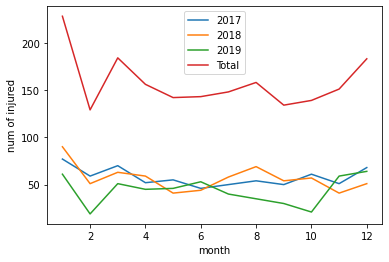

<Figure size 432x288 with 0 Axes>

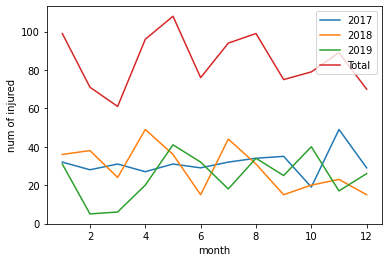

<Figure size 432x288 with 0 Axes>

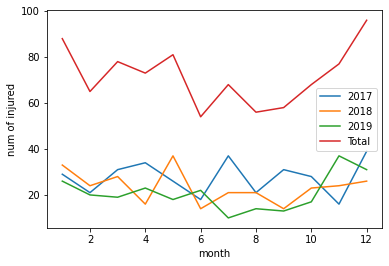

<Figure size 432x288 with 0 Axes>

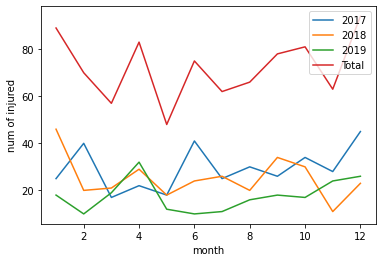

<Figure size 432x288 with 0 Axes>

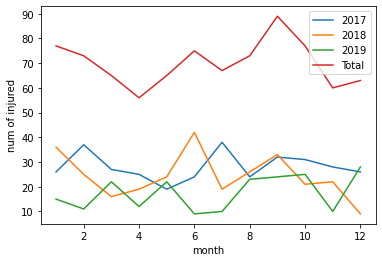

In [30]:
import matplotlib.pyplot as plt

plt.figure(1)
plot=pivot1.plot()
plot.set_xlabel("month")
plot.set_ylabel("num of injured")
plot.legend()
plt.show()

plt.figure(2)
plot=pivot2.plot()
plot.set_xlabel("month")
plot.set_ylabel("num of injured")
plot.legend()
plt.show()

plt.figure(3)
plot=pivot3.plot()
plot.set_xlabel("month")
plot.set_ylabel("num of injured")
plot.legend()
plt.show()

plt.figure(4)
plot=pivot4.plot()
plot.set_xlabel("month")
plot.set_ylabel("num of injured")
plot.legend()
plt.show()

plt.figure(5)
plot=pivot5.plot()
plot.set_xlabel("month")
plot.set_ylabel("num of injured")
plot.legend()
plt.show()

# [ 상위 지역 분석]
## 2) 노면, 기상, 도로형태에 따른 교통사고 발생건수

In [31]:
def pivot2(pv):
  pivot=pv.pivot_table(values="부상자수",index="발생(month)",columns="노면상태",aggfunc=sum)
  pivot=pivot.fillna(0)
  return pivot

pivot_21=pivot2(rank1)
pivot_22=pivot2(rank2)
pivot_23=pivot2(rank3)
pivot_24=pivot2(rank4)
pivot_25=pivot2(rank5)

In [32]:
#test=df_강남구.pivot_table(values="부상자수", index="노면상태", columns="발생(month)", aggfunc=sum)
#test=rank1.pivot_table(values="부상자수", index="발생(month)", columns="노면상태", aggfunc=sum)
#test=test.fillna(0)
#test

In [33]:
pivot_21.sum() #포장-건조, 포장-기타, 포장-젖음/습기

노면상태
비포장 - 기타          2.0
비포장 - 서리/결빙       1.0
포장 - 건조        1560.0
포장 - 기타         123.0
포장 - 서리/결빙        8.0
포장 - 적설           6.0
포장 - 젖음/습기      194.0
포장 - 침수           1.0
dtype: float64

In [34]:
pivot_22.sum() #포장-건조, 포장-젖음/습기

노면상태
포장 - 건조       884.0
포장 - 서리/결빙      1.0
포장 - 적설         1.0
포장 - 젖음/습기    131.0
dtype: float64

In [35]:
pivot_23.sum() #포장-건조, 포장-기타, 포장-젖음/습기

노면상태
포장 - 건조       725.0
포장 - 기타        23.0
포장 - 서리/결빙      2.0
포장 - 적설         1.0
포장 - 젖음/습기    111.0
dtype: float64

In [36]:
pivot_24.sum() #포장-건조, 포장-젖음/습기

노면상태
포장 - 건조       734.0
포장 - 서리/결빙      3.0
포장 - 적설         3.0
포장 - 젖음/습기    126.0
dtype: float64

In [37]:
pivot_25.sum() #포장-건조, 포장-기타, 포장-젖음/습기

노면상태
포장 - 건조       733.0
포장 - 기타        42.0
포장 - 적설         1.0
포장 - 젖음/습기     64.0
dtype: float64

데이터에 대해 전체적으로 살펴본 결과 (포장-건조, 포장-기타, 포장-젖음,습기) 를 제외하고는 발생건수가 매우 작으므로 제거하고 시각화를 한다.

In [38]:
#송파구(pivot_22) ,영등포구(pivot_24)를 기준으로는 '포장-기타' feature가 없으므로 0 값으로 채워넣어준다.
pivot_22['포장 - 기타'] = 0
pivot_24['포장 - 기타'] = 0

In [39]:
pivot_21

노면상태,비포장 - 기타,비포장 - 서리/결빙,포장 - 건조,포장 - 기타,포장 - 서리/결빙,포장 - 적설,포장 - 젖음/습기,포장 - 침수
발생(month),,,,,,,,
1,0.0,1.0,199.0,13.0,6.0,4.0,5.0,0.0
2,0.0,0.0,108.0,6.0,0.0,0.0,15.0,0.0
3,2.0,0.0,157.0,9.0,0.0,0.0,16.0,0.0
4,0.0,0.0,126.0,8.0,0.0,0.0,22.0,0.0
5,0.0,0.0,120.0,7.0,0.0,0.0,15.0,0.0
6,0.0,0.0,123.0,8.0,0.0,0.0,12.0,0.0
7,0.0,0.0,100.0,18.0,0.0,0.0,30.0,0.0
8,0.0,0.0,121.0,13.0,0.0,0.0,23.0,1.0
9,0.0,0.0,109.0,8.0,0.0,0.0,17.0,0.0


In [90]:
#한글폰트 깨지는 현상 수정하기 << 폰트 위치 오류뜸
#import matplotlib.font_manager as fm
#font_path= '/content/gdrive/My Drive/NanumBarunGothic.ttf'
#fontprop=fm.FontProperties(fname=font_path, size=20)

In [99]:
def revise_make_pivot2(pv):
  pivot=pv[['포장 - 건조', '포장 - 기타', '포장 - 젖음/습기']]
  plt.figure()
  ax=pivot.plot.barh(stacked=True)
  ax.set_xlabel("num of injured") #ax.set_xlabel("num of injured",fontproperties=fontprop)
  ax.set_ylabel("month") #ax.set_ylabel("month", fontproperties=fontprop)
  ax.legend()
  plt.show()

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_

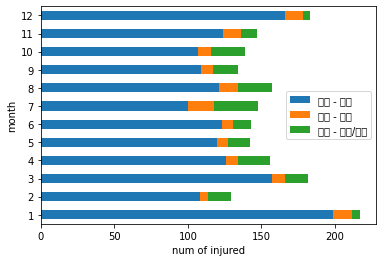

<Figure size 432x288 with 0 Axes>

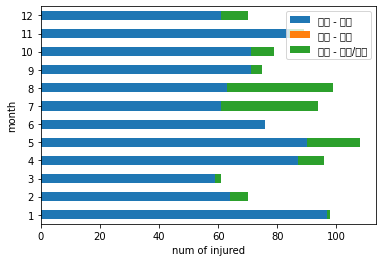

<Figure size 432x288 with 0 Axes>

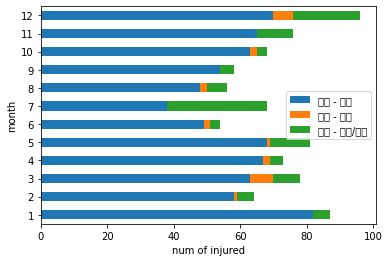

<Figure size 432x288 with 0 Axes>

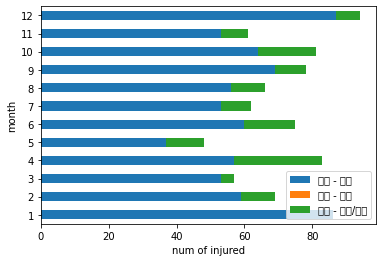

<Figure size 432x288 with 0 Axes>

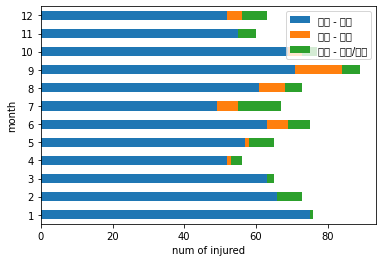

In [100]:
revise_make_pivot2(pivot_21)
revise_make_pivot2(pivot_22)
revise_make_pivot2(pivot_23)
revise_make_pivot2(pivot_24)
revise_make_pivot2(pivot_25)

In [ ]:
# !! plot 한국어 인식 못하는 오류 수정하기 !!

In [ ]:
# 앞으로 해야할 일
# 변수별로 상관관계 수치로 계산해보기
# 비가 발생한 날이 상대적으로 적어서, 부상자수도 적을 수 밖에 없을 수도 있다. => 비율을 맞춰서 날씨별 부상자수를 확인해보기 => 과연 문제가 있을까??



---

# (생략)


In [45]:
data[:1]

,사고번호,사고일시,요일,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,행정구,행정동,발생년도,발생(month),발생(day),발생(hour)
0,2017010100100046,2017년 1월 1일 02시,일요일,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,40세,상해없음,승용,남,52세,상해없음,강서구,화곡동,2017,1,1,02


In [46]:
df_dict = {k: v for k, v in data.groupby('행정구')}
print(df_dict.keys()) #행정구이름

dict_keys(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'])


In [47]:
#df_year_dict = {k: v for k, v in data.groupby('발생년도')}
#print(df_year_dict.keys())

In [48]:
df_dict

{'강남구':                   사고번호               사고일시   요일  ... 발생(month)  발생(day)  발생(hour)
 12    2017010100100421    2017년 1월 1일 23시  일요일  ...         1        1        23
 13    2017010100100422    2017년 1월 1일 23시  일요일  ...         1        1        23
 14    2017010200100021    2017년 1월 2일 00시  월요일  ...         1        2        00
 17    2017010200100079    2017년 1월 2일 07시  월요일  ...         1        2        07
 39    2017010600100125    2017년 1월 6일 08시  금요일  ...         1        6        08
 ...                ...                ...  ...  ...       ...      ...       ...
 7888  2019122900100073  2019년 12월 29일 05시  일요일  ...        12       29        05
 7889  2019122900100074  2019년 12월 29일 05시  일요일  ...        12       29        05
 7894  2019122900100435  2019년 12월 29일 22시  일요일  ...        12       29        22
 7899  2019123100100022  2019년 12월 31일 00시  화요일  ...        12       31        00
 7905  2019123100100064  2019년 12월 31일 04시  화요일  ...        12       31        04
 
 [1069 

In [49]:
df1=df_dict['강남구']
#df1.groupby(df1['사고유형']).sum()

In [50]:
#df1_17=df1[df1['발생년도']=='2017'] #강남구 2017년
#df1_18=df1[df1['발생년도']=='2018'] #강남구 2018년
#df1_19=df1[df1['발생년도']=='2019'] #강남구 2019년

In [51]:
#df1_17

In [52]:
df1_by_week=df1.iloc[:,2].groupby([df1['요일'],df1['발생년도']]).count()

In [53]:
df1_by_week

요일   발생년도
금요일  2017    77
     2018    53
     2019    48
목요일  2017    66
     2018    53
     2019    55
수요일  2017    51
     2018    54
     2019    31
월요일  2017    36
     2018    34
     2019    30
일요일  2017    55
     2018    43
     2019    35
토요일  2017    76
     2018    88
     2019    53
화요일  2017    42
     2018    48
     2019    41
Name: 요일, dtype: int64

In [54]:
day_week_name=['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

occur_df1=pd.DataFrame(columns=['요일','총 발생건수'])
for i in range(len(day_week_name)):
  name = day_week_name[i]
  check = df1_by_week.loc[name]
  occur_count = check.sum()
  occur_df1=occur_df1.append(pd.DataFrame([[name, occur_count]], columns=['요일','총 발생건수']), ignore_index=True)

occur_df1.set_index('요일',inplace=True)

In [55]:
occur_df1 #2017년 강남구의 음주운전 총 발생건수

,총 발생건수
요일,
월요일,100
화요일,131
수요일,136
목요일,174
금요일,178
토요일,217
일요일,133


In [56]:
name=data['행정구'].unique() #행정구 이름으로 리스트 생성

In [57]:
name = ['강서구', '강동구', '송파구', '서초구', '도봉구', '광진구', '관악구', '동대문구', '금천구',
       '강남구', '마포구', '강북구', '구로구', '동작구', '종로구', '성동구', '노원구', '서대문구',
       '영등포구', '용산구', '중랑구', '은평구', '양천구', '성북구', '중구']

In [58]:
# name=data['행정구'].unique() #행정구 이름으로 리스트 생성
# name.sort()

In [59]:
day_week_name=['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
OCCUR_DF=pd.DataFrame()

for i in range(len(name)):
  n=name[i]
  df=df_dict[n]
  df_by_week=df.iloc[:,2].groupby([df['요일'],df['발생년도']]).count()

  occur_df=pd.DataFrame(columns=['요일','총 발생건수'])

  for j in range(len(day_week_name)):
    day = day_week_name[j]
    check = df_by_week.loc[day]
    occur_count = check.sum()
    occur_df=occur_df.append(pd.DataFrame([[day, occur_count]], columns=['요일','총 발생건수']), ignore_index=True)
  
  occur_df.set_index('요일',inplace=True)
  OCCUR_DF=OCCUR_DF.append(occur_df, )

In [60]:
OCCUR_DF

,총 발생건수
요일,
월요일,31
화요일,51
수요일,45
목요일,65
금요일,42
...,...
수요일,25
목요일,27
금요일,25


In [61]:
occur_df

,총 발생건수
요일,
월요일,14
화요일,10
수요일,25
목요일,27
금요일,25
토요일,20
일요일,18


In [62]:
test=name[0]
test_df=df_dict[test]
test_df

,사고번호,사고일시,요일,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,행정구,행정동,발생년도,발생(month),발생(day),발생(hour)
0,2017010100100046,2017년 1월 1일 02시,일요일,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,40세,상해없음,승용,남,52세,상해없음,강서구,화곡동,2017,1,1,02
5,2017010100100093,2017년 1월 1일 05시,일요일,중상사고,0,1,1,0,차대차 - 기타,차로위반,포장 - 서리/결빙,기타,단일로 - 기타,승용,남,24세,상해없음,승용,남,34세,경상,강서구,외발산동,2017,1,1,05
11,2017010100100333,2017년 1월 1일 19시,일요일,경상사고,0,0,2,0,차대차 - 측면충돌,중앙선침범,포장 - 건조,맑음,단일로 - 기타,승용,남,57세,상해없음,승용,남,67세,경상,강서구,방화동,2017,1,1,19
28,2017010400100533,2017년 1월 4일 22시,수요일,중상사고,0,1,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,23세,상해없음,승용,여,40세,상해없음,강서구,가양동,2017,1,4,22
33,2017010500100353,2017년 1월 5일 18시,목요일,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,47세,상해없음,승용,여,46세,경상,강서구,등촌동,2017,1,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,2019122100100590,2019년 12월 21일 22시,토요일,경상사고,0,0,1,0,차대차 - 측면충돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,여,60세,상해없음,승용,남,52세,경상,강서구,염창동,2019,12,21,22
7836,2019122200100035,2019년 12월 22일 00시,일요일,경상사고,0,0,1,0,차대차 - 측면충돌,안전운전불이행,포장 - 서리/결빙,흐림,단일로 - 기타,승용,남,33세,상해없음,승용,남,26세,경상,강서구,화곡동,2019,12,22,00
7852,2019122400100035,2019년 12월 24일 00시,화요일,경상사고,0,0,2,0,차대차 - 후진중충돌,불법유턴,포장 - 건조,맑음,기타 - 기타,승용,남,43세,상해없음,승용,남,43세,경상,강서구,개화동,2019,12,24,00
7865,2019122600100590,2019년 12월 26일 22시,목요일,중상사고,0,1,2,0,차대차 - 정면충돌,중앙선침범,포장 - 건조,흐림,교차로 - 교차로부근,승용,남,51세,상해없음,승용,남,43세,경상,강서구,방화동,2019,12,26,22


In [63]:
name

['강서구',
 '강동구',
 '송파구',
 '서초구',
 '도봉구',
 '광진구',
 '관악구',
 '동대문구',
 '금천구',
 '강남구',
 '마포구',
 '강북구',
 '구로구',
 '동작구',
 '종로구',
 '성동구',
 '노원구',
 '서대문구',
 '영등포구',
 '용산구',
 '중랑구',
 '은평구',
 '양천구',
 '성북구',
 '중구']

In [64]:
df_dict

{'강남구':                   사고번호               사고일시   요일  ... 발생(month)  발생(day)  발생(hour)
 12    2017010100100421    2017년 1월 1일 23시  일요일  ...         1        1        23
 13    2017010100100422    2017년 1월 1일 23시  일요일  ...         1        1        23
 14    2017010200100021    2017년 1월 2일 00시  월요일  ...         1        2        00
 17    2017010200100079    2017년 1월 2일 07시  월요일  ...         1        2        07
 39    2017010600100125    2017년 1월 6일 08시  금요일  ...         1        6        08
 ...                ...                ...  ...  ...       ...      ...       ...
 7888  2019122900100073  2019년 12월 29일 05시  일요일  ...        12       29        05
 7889  2019122900100074  2019년 12월 29일 05시  일요일  ...        12       29        05
 7894  2019122900100435  2019년 12월 29일 22시  일요일  ...        12       29        22
 7899  2019123100100022  2019년 12월 31일 00시  화요일  ...        12       31        00
 7905  2019123100100064  2019년 12월 31일 04시  화요일  ...        12       31        04
 
 [1069 



---

